In [17]:
from sklearn import svm
import numpy as np
svc = svm.SVC(gamma=0.001, C=100)

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

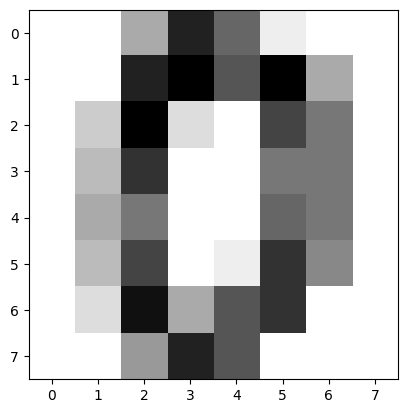

In [4]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation='nearest')

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.target.size

1797

Learning and Predicting

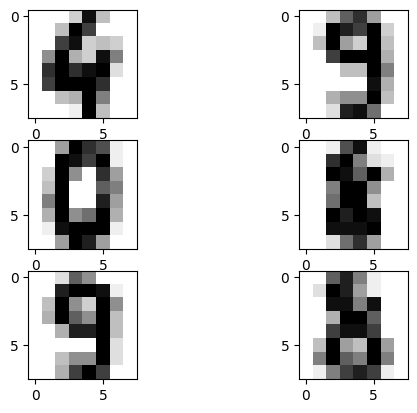

In [7]:
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r,
interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r,
interpolation='nearest')



Now you can train the svc estimator that you defined earlier.

In [8]:
svc.fit(digits.data[1:1790], digits.target[1:1790])

SVC(C=100, gamma=0.001)

After a short time, the trained estimator will appear with text output.

In [9]:
"""SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,gamma=0.001,
   kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
"""

"SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,gamma=0.001,\n   kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)\n"

In [10]:
svc.predict(digits.data[1791:1976])


array([4, 9, 0, 8, 9, 8])

In [11]:
digits.target[1791:1976]

array([4, 9, 0, 8, 9, 8])

In [12]:
from tensorflow.learn.python.learn.datasets.mnist import read_data_sets
import numpy as np
import matplotlib.pyplot as plt

2022-12-22 09:30:27.603921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 09:30:27.747000: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-22 09:30:27.747016: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-22 09:30:28.362954: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

ModuleNotFoundError: No module named 'tensorflow.learn'

In [13]:
mnist = read_data_sets ("MNIST_data/", one_hot=False)

NameError: name 'read_data_sets' is not defined

In [14]:
pixels,real_values = mnist.train.next_batch(10)
print("list of values loaded",real_values)

NameError: name 'mnist' is not defined

In [19]:
from PIL import Image
image = np.reshape(pixels[1,:],[28,28])
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

NameError: name 'pixels' is not defined

In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

ModuleNotFoundError: No module named 'tensorflow.examples'

In [ ]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1
# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape
28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes
# Create model
# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
evidence = tf.matmul(x, W) + b
# Construct model
activation = tf.nn.softmax(evidence) # Softmax
# Minimize error using cross entropy
cross_entropy = y*tf.log(activation)
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy,reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#Plot settings
avg_set = []
epoch_set=[]
# Initializing the variables
init = tf.global_variables_initializer()
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_
ys})/total_batch
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".
format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print("Training phase finished")
    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training
phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Model accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))